In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
dataset=pd.read_csv("./covid19_Confirmed_dataset.csv")

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
131,India,0,0,0,0,0,0,0,0,1,...,20080,21370,23077,24530,26283,27890,29451,31324,33062,34863


In [32]:
dataset.drop(columns=['Province/State', 'Lat', 'Long'],axis=1,inplace=True)

In [33]:
covid_aggregated=dataset.groupby("Country/Region").sum()
covid_aggregated

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171
Albania,0,0,0,0,0,0,0,0,0,0,...,609,634,663,678,712,726,736,750,766,773
Algeria,0,0,0,0,0,0,0,0,0,0,...,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006
Andorra,0,0,0,0,0,0,0,0,0,0,...,717,723,723,731,738,738,743,743,743,745
Angola,0,0,0,0,0,0,0,0,0,0,...,24,25,25,25,25,26,27,27,27,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,...,466,474,480,484,342,342,342,343,344,344
Western Sahara,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
Yemen,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,6,6


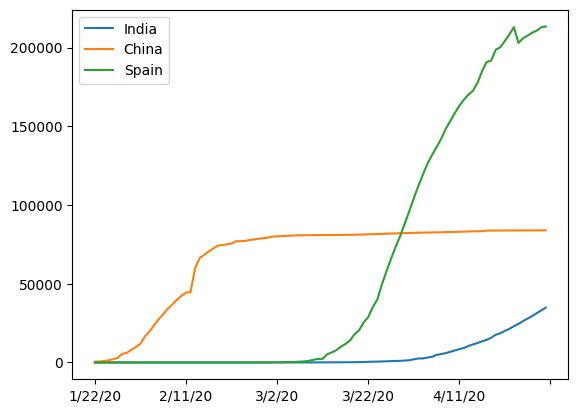

In [43]:
covid_aggregated .loc['India'].plot()
covid_aggregated .loc['China'].plot()
covid_aggregated.loc['Spain'].plot()
plt.legend()
plt.show()


<Axes: >

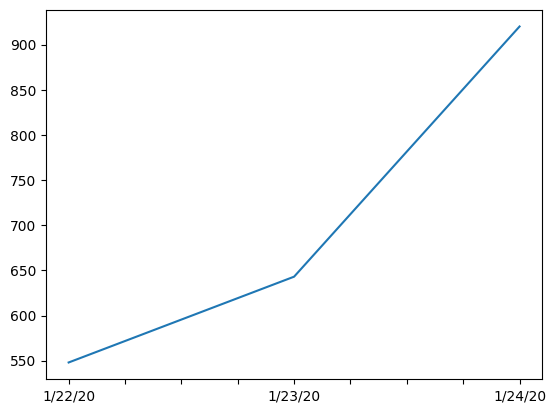

In [44]:
covid_aggregated.loc['China'][:3].plot()

<Axes: >

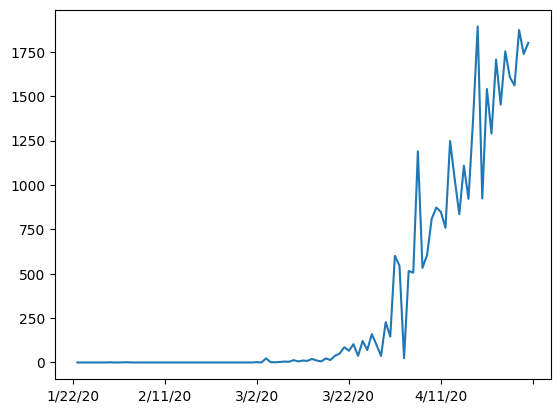

In [45]:
#caluculate good measure
covid_aggregated.loc['India'].diff().plot()

All countries max Infection Rate

In [46]:
countries=list(covid_aggregated.index)
max_infection_rates=[]
for i in countries:
    max_infection_rates.append(covid_aggregated.loc[i].diff().max())

In [48]:
# add max_infection_rates to covid_aggregation
covid_aggregated['max_infection_rates']=max_infection_rates

In [49]:
covid_aggregated.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,max_infection_rates
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,1176,1279,1351,1463,1531,1703,1828,1939,2171,232.0
Albania,0,0,0,0,0,0,0,0,0,0,...,634,663,678,712,726,736,750,766,773,34.0
Algeria,0,0,0,0,0,0,0,0,0,0,...,2910,3007,3127,3256,3382,3517,3649,3848,4006,199.0
Andorra,0,0,0,0,0,0,0,0,0,0,...,723,723,731,738,738,743,743,743,745,43.0
Angola,0,0,0,0,0,0,0,0,0,0,...,25,25,25,25,26,27,27,27,27,5.0


create new Dataframe 

In [54]:
covid_final=covid_aggregated[['max_infection_rates']].copy()

In [55]:
covid_final

,max_infection_rates
Country/Region,
Afghanistan,232.0
Albania,34.0
Algeria,199.0
Andorra,43.0
Angola,5.0
...,...
West Bank and Gaza,66.0
Western Sahara,4.0
Yemen,5.0


In [56]:
covid_final.to_csv('final_covid19.csv')

Read worldwide_happiness Report


In [58]:
happy=pd.read_csv('./worldwide_happiness_report.csv')
happy.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [60]:
# Remove colums Overall Rank,Score,Generosity,Perceptions of corruption
happy.drop(['Perceptions of corruption','Score','Overall rank','Generosity'],axis=1,inplace=True)

In [62]:
happy.set_index('Country or region',inplace=True)

In [64]:
data=covid_final.join(happy,how='inner')

In [66]:
data.to_csv('final.csv')

Visulize the dataset

In [67]:
data.corr()

,max_infection_rates,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices
max_infection_rates,1.000000,0.250118,0.191958,0.289263,0.078196
GDP per capita,0.250118,1.000000,0.759468,0.863062,0.394603
Social support,0.191958,0.759468,1.000000,0.765286,0.456246
Healthy life expectancy,0.289263,0.863062,0.765286,1.000000,0.427892
Freedom to make life choices,0.078196,0.394603,0.456246,0.427892,1.000000


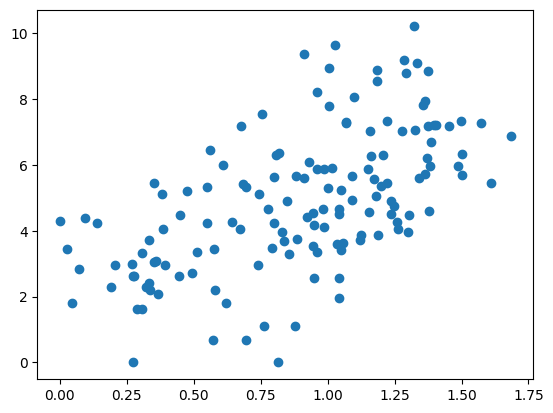

In [73]:
# visualize Gdp per capita and max_infection_rates
x=data["GDP per capita"]
y=data['max_infection_rates']
plt.scatter(x,np.log(y))

<Axes: xlabel='GDP per capita', ylabel='max_infection_rates'>

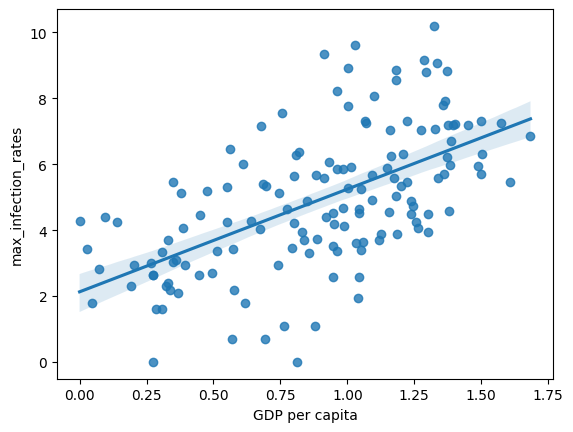

In [82]:
# Linear regression
d=pd.DataFrame(data['GDP per capita']).copy()
data['max_infection_rates']=np.log(data['max_infection_rates'])
sns.regplot(x='GDP per capita',y='max_infection_rates',data=data)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


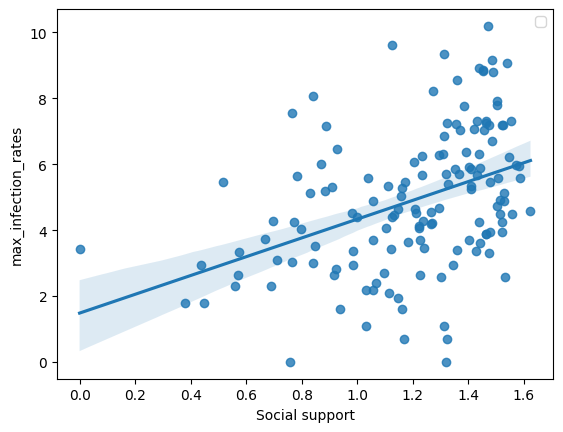

In [85]:
# visulize social support vs max infectionrates
sns.regplot(x='Social support',y='max_infection_rates',data=data)
plt.legend()
plt.show()

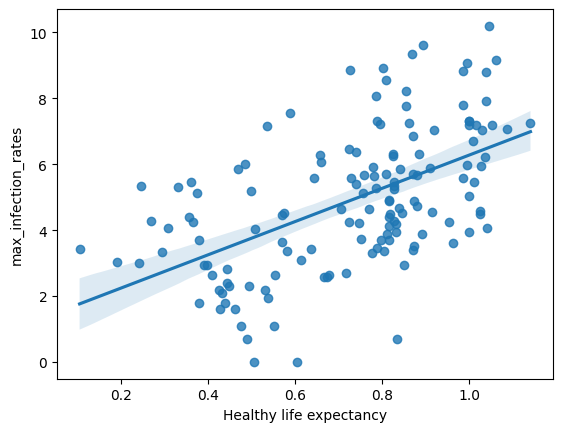

In [89]:
# Healthy life expectancy vs Max_ifection_rates
sns.regplot(x='Healthy life expectancy',y='max_infection_rates',data=data)
plt.show()

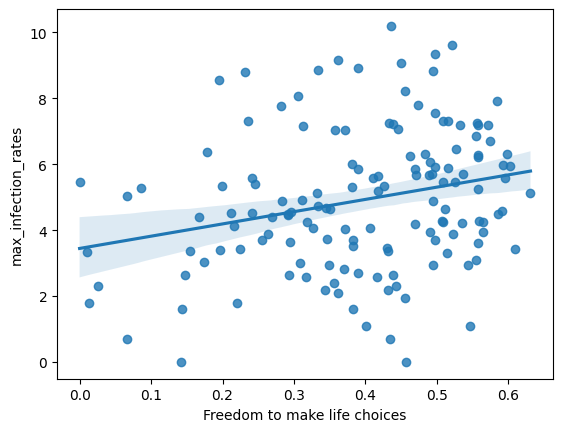

In [90]:
# Freedom to make life choices vs max_infection_rates
sns.regplot(x='Freedom to make life choices',y='max_infection_rates',data=data)
plt.show()